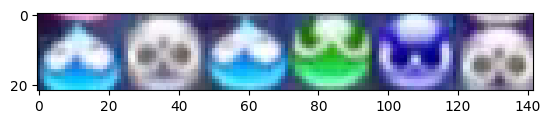

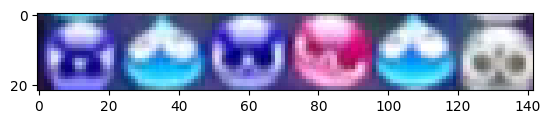

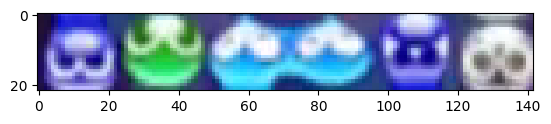

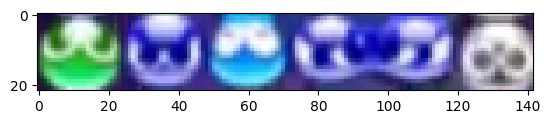

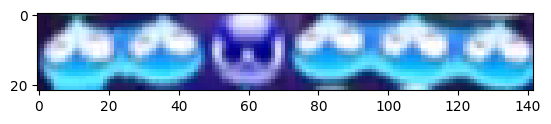

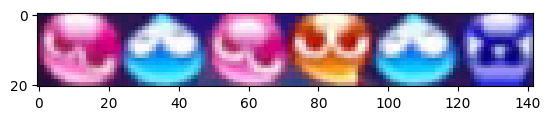

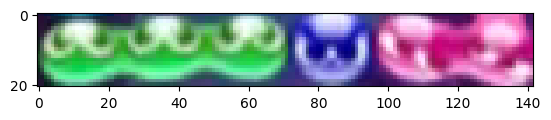

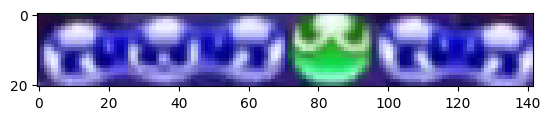

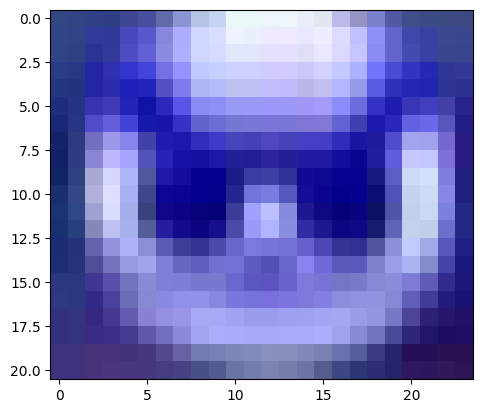

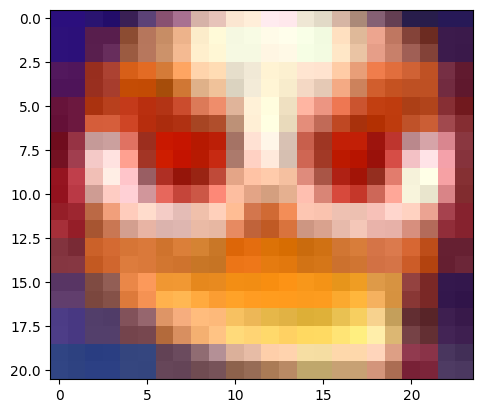

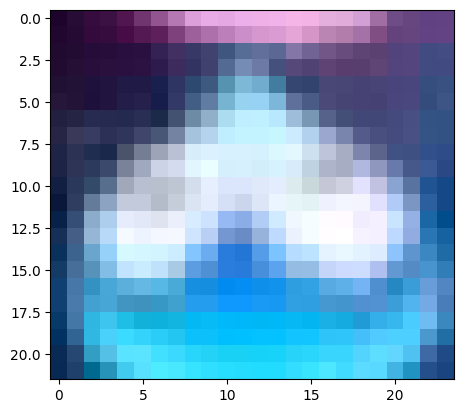

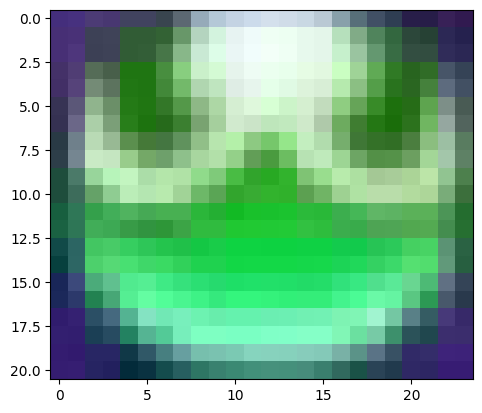

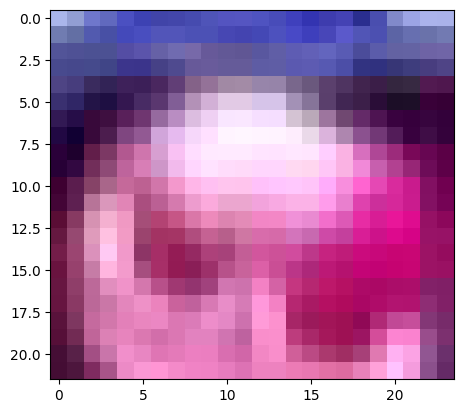

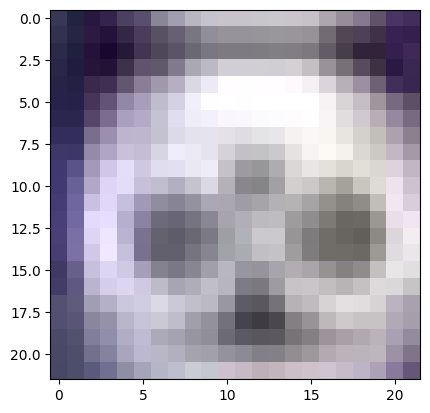

null null red null null null 
null null null null null null 
null null null null null null 
null null null null red null 
null null null null yellow parepul 
null null null null parepul yellow 
yellow yellow null null yellow red 
ozyama ozyama null null yellow parepul 
ozyama parepul parepul null parepul parepul 
parepul yellow parepul ozyama yellow red 
ozyama ozyama ozyama yellow red red 
yellow yellow yellow parepul yellow yellow 


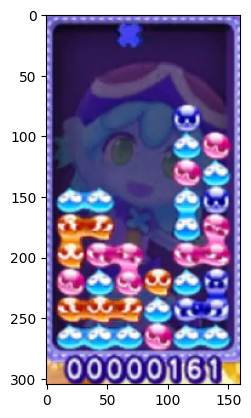

In [9]:
# 画像認識サンプル2
from puyo import field_list
from puyo_info import field, puyo_red, puyo_yellow, puyo_green, puyo_parerpul, puyo_blue, puyo_ozyama, row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8
import cv2
import numpy as np
from IPython.display import Image, display
from matplotlib import pyplot as plt

plt.imshow(row_8)
plt.show()
plt.imshow(row_7)
plt.show()
plt.imshow(row_6)
plt.show()
plt.imshow(row_5)
plt.show()
plt.imshow(row_4)
plt.show()
plt.imshow(row_3)
plt.show()
plt.imshow(row_2)
plt.show()
plt.imshow(row_1)
plt.show()


plt.imshow(puyo_red)
plt.show()
plt.imshow(puyo_blue)
plt.show()
plt.imshow(puyo_yellow)
plt.show()
plt.imshow(puyo_green)
plt.show()
plt.imshow(puyo_parerpul)
plt.show()
plt.imshow(puyo_ozyama)
plt.show()
puyo_green_hsv = cv2.cvtColor(puyo_green, cv2.COLOR_BGR2HSV)
puyo_red_hsv = cv2.cvtColor(puyo_red, cv2.COLOR_BGR2HSV)
puyo_yellow_hsv = cv2.cvtColor(puyo_yellow, cv2.COLOR_BGR2HSV)
puyo_parerpul_hsv = cv2.cvtColor(puyo_parerpul, cv2.COLOR_BGR2HSV)
puyo_blue_hsv = cv2.cvtColor(puyo_blue, cv2.COLOR_BGR2HSV)
puyo_ozyama_hsv = cv2.cvtColor(puyo_ozyama, cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(puyo_green_hsv)
hist_green = cv2.calcHist([h], [0], None, [256], [0, 256])
h,s,v = cv2.split(puyo_red_hsv)
hist_red = cv2.calcHist([h], [0], None, [256], [0, 256])
h,s,v = cv2.split(puyo_yellow_hsv)
hist_ywllow = cv2.calcHist([h], [0], None, [256], [0, 256])
h,s,v = cv2.split(puyo_parerpul_hsv)
hist_parerpul = cv2.calcHist([h], [0], None, [256], [0, 256])
h,s,v = cv2.split(puyo_blue_hsv)
hist_blue = cv2.calcHist([h], [0], None, [256], [0, 256])
h,s,v = cv2.split(puyo_ozyama_hsv)
hist_ozyama = cv2.calcHist([h], [0], None, [256], [0, 256])

field_hsv = cv2.cvtColor(field, cv2.COLOR_BGR2HSV)
for row in reversed(field_list):
    for i in range(6):
        puyo = row[i]
        puyo_hsv = cv2.cvtColor(puyo, cv2.COLOR_BGR2HSV)
        h,s,v = cv2.split(puyo_hsv)
        hist_h = cv2.calcHist([h], [0], None, [256], [0, 256])
        hist_s = cv2.calcHist([s], [0], None, [256], [0, 256])
        # print(hist_h)
        
        s_avg = np.mean(v)
        
        # method = cv2.HISTCMP_INTERSECT
        method = cv2.HISTCMP_CORREL
        rate_green = {'color': 'green', 'rate':cv2.compareHist(hist_h, hist_green, method)}
        rate_red = {'color': 'red', 'rate':cv2.compareHist(hist_h, hist_red, method)}
        rate_yellow = {'color': 'yellow', 'rate':cv2.compareHist(hist_h, hist_ywllow, method)}
        rate_parepul = {'color': 'parepul', 'rate':cv2.compareHist(hist_h, hist_parerpul, method)}
        rate_blue = {'color': 'blue', 'rate':cv2.compareHist(hist_h, hist_blue, method)}
        rate_ozyama = {'color': 'ozyama', 'rate':cv2.compareHist(hist_h, hist_ozyama, method)}

        
        rate_list = [rate_green, rate_red, rate_yellow, rate_parepul, rate_ozyama]
        color = max(rate_list, key=lambda x: x['rate'])
        
        # 彩度が130以下は空白
        if s_avg <= 130:
            print('null', end=' ')
        else:
            print(color['color'], end=' ')
    print('')

fig = plt.figure()
plt.imshow(field)